# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

#Setting a base color to use in the visualization
color = sns.color_palette()[0]

#Setting a base style 
sns.set_style('darkgrid')
'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv' , sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv' , sep = ';')

#### Exploring the general polulation dataset

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.head()


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [5]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [6]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [7]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

##### Define 

In this step 1.1.1 I'm going to serach for the missing codes in the data set and replace them with NaN using `numpy.nan` im going to test my solution on the first column `AGER_TYP` to see if the results are correct 

In [8]:
# note: In this column the value -1 is unknown so before changing it i'm going to view it 
azdias.AGER_TYP[azdias.AGER_TYP == -1]

0        -1
1        -1
2        -1
4        -1
6        -1
7        -1
8        -1
9        -1
11       -1
12       -1
13       -1
14       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
30       -1
31       -1
32       -1
33       -1
35       -1
         ..
891185   -1
891186   -1
891187   -1
891188   -1
891189   -1
891192   -1
891194   -1
891196   -1
891197   -1
891198   -1
891199   -1
891200   -1
891201   -1
891202   -1
891203   -1
891204   -1
891206   -1
891208   -1
891209   -1
891210   -1
891211   -1
891212   -1
891213   -1
891214   -1
891215   -1
891216   -1
891217   -1
891218   -1
891219   -1
891220   -1
Name: AGER_TYP, Length: 677503, dtype: int64

In [9]:
# here is another column that has unknown values
(azdias['CAMEO_DEU_2015'] == 'XX').any()

True

#### Code

In [10]:
azdias.iloc[: , 0]

0        -1
1        -1
2        -1
3         2
4        -1
5         3
6        -1
7        -1
8        -1
9        -1
10        0
11       -1
12       -1
13       -1
14       -1
15        1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29        2
         ..
891191    1
891192   -1
891193    2
891194   -1
891195    2
891196   -1
891197   -1
891198   -1
891199   -1
891200   -1
891201   -1
891202   -1
891203   -1
891204   -1
891205    1
891206   -1
891207    1
891208   -1
891209   -1
891210   -1
891211   -1
891212   -1
891213   -1
891214   -1
891215   -1
891216   -1
891217   -1
891218   -1
891219   -1
891220   -1
Name: AGER_TYP, Length: 891221, dtype: int64

In [11]:
# Identify missing or unknown data values and convert them to NaNs.

#Iterating through missing_or_unknown attribute in feat_info df 
for counter , val in enumerate(feat_info.missing_or_unknown):
    missing_or_unknown_vals = []
    val = val.strip("'[]'")
    val = val.split(',')
    for v in val:
        if v != '' and v != 'X' and v != 'XX':
            missing_or_unknown_vals.append(int(v))
        else:
            missing_or_unknown_vals.append(v)
        
        azdias.iloc[:,counter] = azdias.iloc[:,counter].replace(missing_or_unknown_vals , np.nan)

In [12]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


##### Test

In [13]:
# View after change 
azdias[azdias.AGER_TYP == -1]

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB


In [14]:
# View after change 
(azdias['CAMEO_DEU_2015'] == 'XX').any()

False

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [15]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

#getting the missing data in the columns 
missing_data = (azdias.isnull().sum() != 0)

# initiating a list
missing_data_cols = []

#initiating an empty variable to calculate the sum 
missing_data_sum = 0

for val , index in zip(missing_data , missing_data.index):
    if val is True:
        missing_data_cols.append(index)
        missing_data_sum += azdias[index].isnull().sum() 
not_missing_data =  azdias.notnull().sum().sum()

In [16]:
#printing each column and the missing points in it 
for s in missing_data_cols:
    print("'{}' column has '{}' missing points ".format(s , azdias[s].isnull().sum()))

'AGER_TYP' column has '685843' missing points 
'ALTERSKATEGORIE_GROB' column has '2881' missing points 
'CJT_GESAMTTYP' column has '4854' missing points 
'GEBURTSJAHR' column has '392318' missing points 
'GFK_URLAUBERTYP' column has '4854' missing points 
'HEALTH_TYP' column has '111196' missing points 
'LP_LEBENSPHASE_FEIN' column has '97632' missing points 
'LP_LEBENSPHASE_GROB' column has '94572' missing points 
'LP_FAMILIE_FEIN' column has '77792' missing points 
'LP_FAMILIE_GROB' column has '77792' missing points 
'LP_STATUS_FEIN' column has '4854' missing points 
'LP_STATUS_GROB' column has '4854' missing points 
'NATIONALITAET_KZ' column has '108315' missing points 
'PRAEGENDE_JUGENDJAHRE' column has '108164' missing points 
'RETOURTYP_BK_S' column has '4854' missing points 
'SHOPPER_TYP' column has '111196' missing points 
'SOHO_KZ' column has '73499' missing points 
'TITEL_KZ' column has '889061' missing points 
'VERS_TYP' column has '111196' missing points 
'ALTER_HH' column 

In [17]:
#printing the whole missing points in the dataset
print('The missing data in the dataset is {} out of {}'.format(missing_data_sum , not_missing_data))

The missing data in the dataset is 8373929 out of 67379856


In [18]:
#threshold for allowing columns to have missing data
drop_rate = missing_data_sum / not_missing_data

In [19]:
# Investigate patterns in the amount of missing data in each column.
prop_missing = [azdias[col].isnull().sum() / azdias.shape[0] for col in list(azdias)]
prop_missing

[0.76955435296071339,
 0.0032326437550282143,
 0.0,
 0.0054464605299920001,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.44020282286885071,
 0.0054464605299920001,
 0.0,
 0.12476815514894735,
 0.10954858559212585,
 0.10611509378706292,
 0.087286991666489011,
 0.087286991666489011,
 0.0054464605299920001,
 0.0054464605299920001,
 0.12153551139391913,
 0.12136608091595687,
 0.0054464605299920001,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.12476815514894735,
 0.082470004634091876,
 0.99757635872583794,
 0.12476815514894735,
 0.0,
 0.34813699407890975,
 0.082470004634091876,
 0.082470004634091876,
 0.020587486156632306,
 0.65596748730112953,
 0.16605084485217472,
 0.082470004634091876,
 0.11176913470396231,
 0.10884842255736793,
 0.10451728583594866,
 0.082997371022451222,
 0.10451728583594866,
 0.10451728583594866,
 0.10451728583594866,
 0.11147852216229195,
 0.11147852216229195,
 0.11147852216229195,
 0.14959701353536328,
 0.14959701353536328,


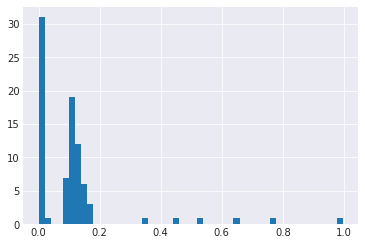

In [20]:
plt.hist(prop_missing , bins = 50);

In [21]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# removing the columns that are above the predefined threshold
remove_cols = [col for col in list(azdias) if azdias[col].isnull().sum() / azdias.shape[0] > drop_rate]
azdias = azdias.drop(remove_cols , axis = 1)
azdias.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_INTL_2015,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,ONLINE_AFFINITAET,KBA13_ANZAHL_PKW,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,1.0,2,5.0,1,5,2,5,4,5,1,...,51,6.0,3.0,8.0,3.0,3.0,963.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,24,2.0,4.0,4.0,4.0,2.0,712.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,12,4.0,2.0,6.0,4.0,1.0,596.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,43,2.0,5.0,1.0,5.0,5.0,435.0,4.0,6.0,5.0


#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)


- We have `8373929 ` data entries are  missing out of `67379856` so I calculated the precentage of the missing values in the whole dataset and we get `0.12` and that rate is going to be the drop rate for each column , After calculating the proportion of the missing values in each column I selected the columns that have more than the predefined drop_rate (**0.12**) to be dropped 

- The columns are: 

>'AGER_TYP' , 'GEBURTSJAHR' , 'HEALTH_TYP' , 'SHOPPER_TYP' , 'TITEL_KZ' , 'VERS_TYP' , 'ALTER_HH' , 'KK_KUNDENTYP' , 'W_KEIT_KIND_HH' , 'KBA05_ANTG1' , 'KBA05_ANTG2' , 'KBA05_ANTG3' , 'KBA05_ANTG4' , 'KBA05_BAUMAX' , 'KBA05_GBZ' , 'KKK' , 'MOBI_REGIO' , 'REGIOTYP' , 'PLZ8_ANTG1','PLZ8_ANTG2' , 'PLZ8_ANTG3' , 'PLZ8_ANTG4' , 'PLZ8_BAUMAX' , 'PLZ8_HHZ' , 'PLZ8_GBZ'

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [24]:
azdias.isnull().sum(axis=1)

0         24
1          0
2          0
3          4
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        28
12         0
13         0
14        28
15         1
16         5
17        28
18         0
19         0
20         1
21         0
22         0
23         1
24        28
25         4
26         4
27         0
28         0
29         0
          ..
891191     0
891192     0
891193     0
891194     0
891195     0
891196     0
891197     0
891198     0
891199     0
891200     0
891201     0
891202     0
891203     5
891204     0
891205     0
891206     0
891207     0
891208     0
891209     0
891210     0
891211     0
891212     0
891213     0
891214     0
891215     0
891216     3
891217     1
891218     4
891219     0
891220     0
Length: 891221, dtype: int64

In [25]:
# How much data is missing in each row of the dataset?

#lambda function to calculate the missing points in each row 
rows = azdias.isnull().sum(axis=1)

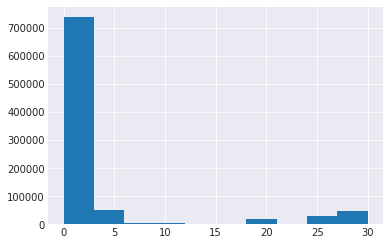

In [26]:
plt.hist(rows)
plt.show()

As we can see in the above distribution plot that most of our data have 0 missing entries(not null entires) and only few rows with 5 missing entries so im going to divide my dataset into two dataset above 5 and below 5 (which we will allow) 

In [27]:
# columns that have no missing data
no_missing = azdias.columns[~azdias.columns.isin(missing_data_cols)]

In [28]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
above_threshold = rows[rows>5] 
below_threshold = rows[rows<5] 

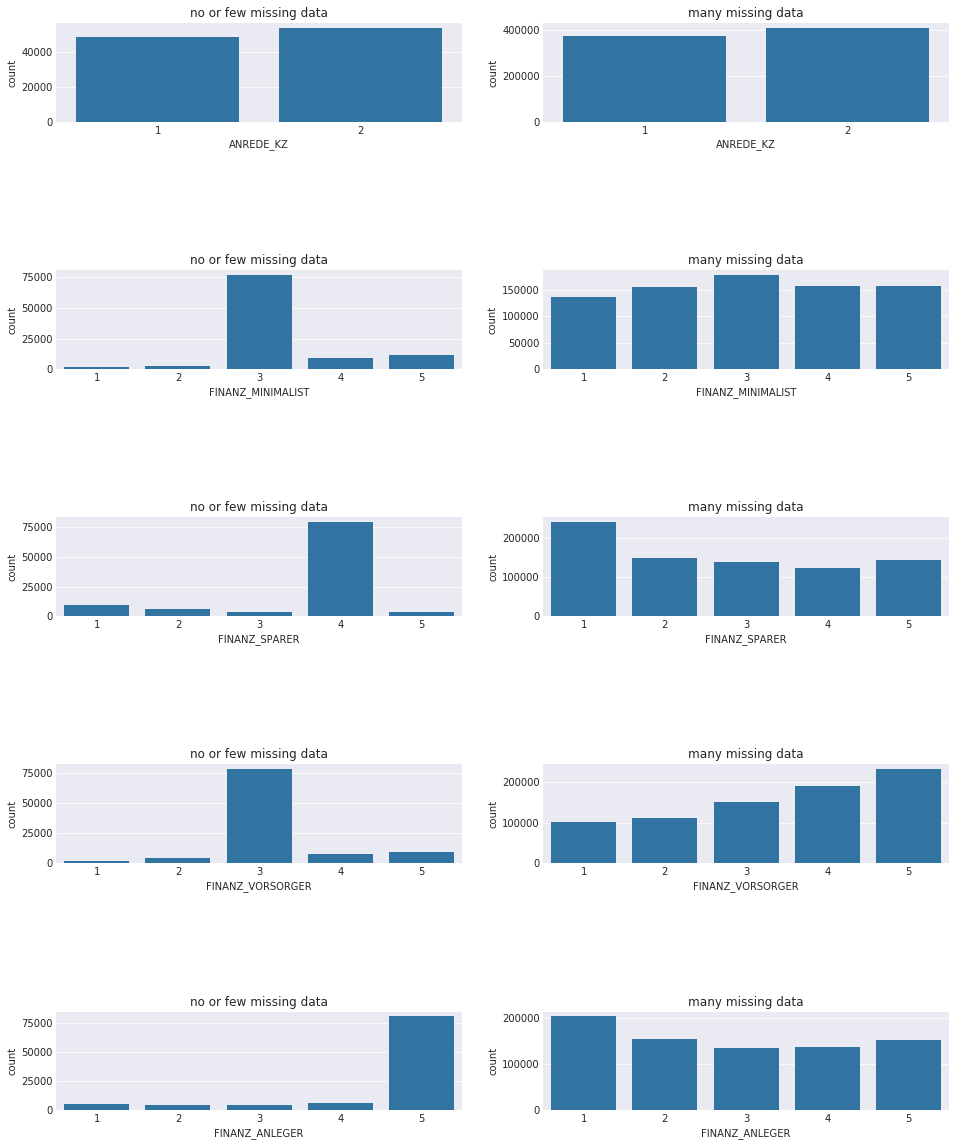

In [29]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# plotting each subset with the selected columns ( few or no missing data in columns ) 
fig , ax = plt.subplots(5,2, figsize=(16,20))
fig.subplots_adjust(hspace = 1.5)
for counter , col in enumerate(no_missing[:5]):
    
        plot_above_threshold = (azdias.loc[above_threshold.index, col] )
        sns.countplot(plot_above_threshold, ax = ax[counter][0] , color =color )
        ax[counter][0].set_title('no or few missing data')

        plot_below_threshold = (azdias.loc[below_threshold.index, col])
        sns.countplot(plot_below_threshold , ax = ax[counter][1] , color = color)
        ax[counter][1].set_title('many missing data')


#### Discussion 1.1.3: Assess Missing Data in Each Row

- For the `Anrede` (address in english) the data looks the same between the two subsets but in the other selected columns `Finanz` columns the data have a huge amount of differences on the (no or few missing data) subset but in the (many missing data) subset there's no big of a difference .

In [32]:
feat_info.type.unique()

array(['categorical', 'ordinal', 'numeric', 'mixed', 'interval'], dtype=object)

In [33]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [34]:
# How many features are there of each data type?

# getting the columns names that are categorical
categorical_col = feat_info[feat_info.type == 'categorical']['attribute'].values.tolist()

#getting the columns names that are mixed 
mixed_col = feat_info[feat_info.type == 'mixed']['attribute'].values.tolist()
len(categorical_col) , len(mixed_col)

(21, 7)

In [35]:
categorical_col

['AGER_TYP',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'TITEL_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'KK_KUNDENTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [36]:
mixed_col

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE',
 'CAMEO_INTL_2015',
 'KBA05_BAUMAX',
 'PLZ8_BAUMAX']

In [37]:
#creating a temp dataset with only the categorical columns
categorical_df = azdias.loc[: , azdias.columns.intersection(categorical_col)]
categorical_df

,ANREDE_KZ,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SOHO_KZ,ZABEOTYP,GEBAEUDETYP,OST_WEST_KZ,CAMEO_DEUG_2015,CAMEO_DEU_2015
0,1,2.0,4,10.0,0,2.0,2.0,1.0,1.0,NaN,NaN,3,NaN,NaN,NaN,NaN
1,2,5.0,1,10.0,0,5.0,3.0,2.0,1.0,1.0,1.0,5,8.0,W,8,8A
2,2,3.0,1,10.0,1,1.0,1.0,3.0,2.0,1.0,0.0,5,1.0,W,4,4C
3,2,2.0,6,1.0,0,NaN,NaN,9.0,4.0,1.0,0.0,3,1.0,W,2,2A
4,1,5.0,5,5.0,0,10.0,5.0,3.0,2.0,1.0,0.0,4,1.0,W,6,6B
5,2,2.0,2,1.0,0,1.0,1.0,4.0,2.0,1.0,0.0,4,1.0,W,8,8C
6,2,5.0,4,12.0,0,1.0,1.0,2.0,1.0,1.0,0.0,4,1.0,W,4,4A
7,1,3.0,5,9.0,0,1.0,1.0,1.0,1.0,1.0,0.0,1,8.0,W,2,2D
8,1,3.0,6,3.0,1,1.0,1.0,10.0,5.0,1.0,0.0,6,3.0,W,1,1A
9,2,4.0,1,12.0,1,1.0,1.0,3.0,2.0,1.0,0.0,4,3.0,W,1,1E


In [38]:
#creating a temp dataset with only the mixed columns
mixed_df = azdias.loc[: , azdias.columns.intersection(mixed_col)]
mixed_df

,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,WOHNLAGE,CAMEO_INTL_2015
0,15.0,4.0,NaN,NaN,NaN
1,21.0,6.0,14.0,4.0,51
2,3.0,1.0,15.0,2.0,24
3,NaN,NaN,8.0,7.0,12
4,32.0,10.0,8.0,3.0,43
5,8.0,2.0,3.0,7.0,54
6,2.0,1.0,10.0,5.0,22
7,5.0,2.0,8.0,1.0,14
8,10.0,3.0,11.0,1.0,13
9,4.0,1.0,15.0,7.0,15


**NOTE** some of the categorical columns we selected above has been dropped so thats why we only have 16 here

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [39]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

#printing the unique values in each categorical columns 
for col in list(categorical_df):
    print('The {} column: \n Values: {}\n\n'.format(col , categorical_df[col].unique()))

The ANREDE_KZ column: 
 Values: [1 2]


The CJT_GESAMTTYP column: 
 Values: [  2.   5.   3.   4.   1.   6.  nan]


The FINANZTYP column: 
 Values: [4 1 6 5 2 3]


The GFK_URLAUBERTYP column: 
 Values: [ 10.   1.   5.  12.   9.   3.   8.  11.   4.   2.   7.   6.  nan]


The GREEN_AVANTGARDE column: 
 Values: [0 1]


The LP_FAMILIE_FEIN column: 
 Values: [  2.   5.   1.  nan  10.   7.  11.   3.   8.   4.   6.   9.]


The LP_FAMILIE_GROB column: 
 Values: [  2.   3.   1.  nan   5.   4.]


The LP_STATUS_FEIN column: 
 Values: [  1.   2.   3.   9.   4.  10.   5.   8.   6.   7.  nan]


The LP_STATUS_GROB column: 
 Values: [  1.   2.   4.   5.   3.  nan]


The NATIONALITAET_KZ column: 
 Values: [ nan   1.   3.   2.]


The SOHO_KZ column: 
 Values: [ nan   1.   0.]


The ZABEOTYP column: 
 Values: [3 5 4 1 6 2]


The GEBAEUDETYP column: 
 Values: [ nan   8.   1.   3.   2.   6.   4.   5.]


The OST_WEST_KZ column: 
 Values: [nan 'W' 'O']


The CAMEO_DEUG_2015 column: 
 Values: [nan '8' '4' '2' 

As we can see above we have `ANREDE_KZ ` , `GREEN_AVANTGARDE` and `SOHO_KZ` holds only two values

1- I'm going to re-encode the `OST_WEST_KZ` to only hold binary numeric values 

2- I'm just going to drop the Multi=level columns 

##### Define 1

I'm going to use pandas `DataFrame.replace` function to replace the non-numeric values and then I'm going to change the data type of the column to float

In [40]:
#just to view before the changing
categorical_df.OST_WEST_KZ.head()

0    NaN
1      W
2      W
3      W
4      W
Name: OST_WEST_KZ, dtype: object

##### Code

In [45]:
# Re-encode categorical variable(s) to be kept in the analysis.
categorical_df.OST_WEST_KZ.replace('W' , '1' , inplace = True)
categorical_df.OST_WEST_KZ.replace('O' , '0' , inplace = True)
categorical_df.OST_WEST_KZ[categorical_df.OST_WEST_KZ.notnull()] = categorical_df.OST_WEST_KZ[categorical_df.OST_WEST_KZ.notnull()].astype(float)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


##### Test

In [46]:
#view after the change 
categorical_df.OST_WEST_KZ.head()

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
Name: OST_WEST_KZ, dtype: float64

##### Define 2

For the Multi-level categorical column I'm just going to drop them using the `.drop` function 

##### Code

In [43]:
#deleting the multi-level columns 
delete_cols = categorical_df.columns[~categorical_df.columns.isin(['GREEN_AVANTGARDE' , 'SOHO_KZ' , 'OST_WEST_KZ' , 'ANREDE_KZ'])]
categorical_df.drop(delete_cols , inplace = True , axis = 1)

##### Test

In [47]:
categorical_df.head()

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ
0,1,0,NaN,NaN
1,2,0,1.0,1.0
2,2,1,0.0,1.0
3,2,0,0.0,1.0
4,1,0,0.0,1.0


as we can see we only have the binary (two-level) columns


#### Discussion 1.2.1: Re-Encode Categorical Features


- The columns that I'm going to leave is :

    1- GREEN_AVANTGARDE

    2-  SOHO_KZ
    

- For the OST_WEST_KZ column I'm going to re-encode it to holds numeric binary value 

> O : 0

> W : 1

- For The rest columns I'm going to drop them to reduce the calculation 

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

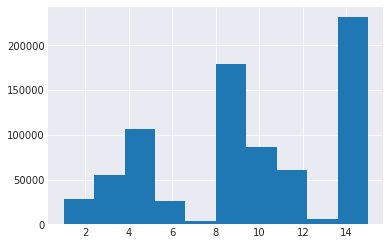

In [48]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
mixed_df.PRAEGENDE_JUGENDJAHRE.hist();

In [49]:
mixed_df.PRAEGENDE_JUGENDJAHRE.value_counts()

14.0    188697
8.0     145988
5.0      86416
10.0     85808
3.0      55195
15.0     42547
11.0     35752
9.0      33570
6.0      25652
12.0     24446
1.0      21282
4.0      20451
2.0       7479
13.0      5764
7.0       4010
Name: PRAEGENDE_JUGENDJAHRE, dtype: int64

In [50]:
#creating a dictionary with the values that are going to change 
movement_dict = {1:1 , 2:0 , 3:1 , 4:0 , 5:1 , 6:0 , 7:0 , 8:1 , 9:0 , 10:1 , 11:0 , 12:1 , 13:0 , 14:1 , 15:0 }
mixed_df['MOVEMENT'] = mixed_df.PRAEGENDE_JUGENDJAHRE.replace(movement_dict.keys() , movement_dict.values())

decade_dict = {1:1940 , 2:1940 , 3:1950 , 4:1950 , 5:1960 , 6:1960 , 7:1960 , 8:1970 , 9:1970 , 10:1980 , 11:1980 , 12:1980 , 13:1980 , 14:1990 , 15:1990}
mixed_df['DECADE'] = mixed_df.PRAEGENDE_JUGENDJAHRE.replace(decade_dict.keys() , decade_dict.values())

#dropping the old column ('PRAEGENDE_JUGENDJAHRE')
mixed_df.drop('PRAEGENDE_JUGENDJAHRE' , inplace = True , axis = 1)

In [51]:
mixed_df.head()

,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,WOHNLAGE,CAMEO_INTL_2015,MOVEMENT,DECADE
0,15.0,4.0,NaN,NaN,NaN,NaN
1,21.0,6.0,4.0,51,1.0,1990.0
2,3.0,1.0,2.0,24,0.0,1990.0
3,NaN,NaN,7.0,12,1.0,1970.0
4,32.0,10.0,3.0,43,1.0,1970.0


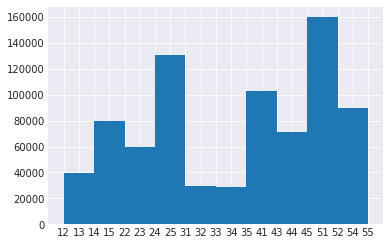

In [52]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
mixed_df.CAMEO_INTL_2015.hist();

In [53]:
mixed_df.CAMEO_INTL_2015.unique()

array([nan, '51', '24', '12', '43', '54', '22', '14', '13', '15', '33',
       '41', '34', '55', '25', '23', '31', '52', '35', '45', '44', '32'], dtype=object)

In [54]:
#the above cell tells that this attribute is object so im going to change it to float
mixed_df.CAMEO_INTL_2015 = mixed_df.CAMEO_INTL_2015.astype(float)

In [55]:
#creating a dict with the replacing values 
wealth_dict = {11:1 , 12:1 , 13:1 , 14:1 , 15:1 , 21:2 ,
               22:2 , 23:2 , 24:2 , 25:2 , 31:3 , 32:3 ,
               33:3 , 34:3 , 35:3 , 41:4 , 42:4 , 43:4 ,
               44:4 , 45:4 , 51:5 , 52:5 , 53:5 , 54:5 , 55:5 }
mixed_df['WEALTH'] = mixed_df.CAMEO_INTL_2015.replace(wealth_dict.keys() , wealth_dict.values()) 

life_stage_dict = {11:1 , 12:2 , 13:3 , 14:4 , 15:5 , 21:1 ,
               22:2 , 23:3 , 24:4 , 25:5 , 31:1 , 32:2 ,
               33:3 , 34:4 , 35:5 , 41:1 , 42:2 , 43:3 ,
               44:4 , 45:5 , 51:1 , 52:2 , 53:3 , 54:4 , 55:5 }
mixed_df['LIFE_STAGE'] = mixed_df.CAMEO_INTL_2015.replace(life_stage_dict.keys() , life_stage_dict.values()) 

#dropping the old column (before the change)
mixed_df.drop('CAMEO_INTL_2015' , axis = 1 , inplace = True)


In [56]:
#dropping the other mixed columns
mixed_df.drop(['LP_LEBENSPHASE_FEIN' , 'LP_LEBENSPHASE_GROB' , 'WOHNLAGE'] ,axis = 1 , inplace = True)

In [57]:
mixed_df.head()

,MOVEMENT,DECADE,WEALTH,LIFE_STAGE
0,NaN,NaN,NaN,NaN
1,1.0,1990.0,5.0,1.0
2,0.0,1990.0,2.0,4.0
3,1.0,1970.0,1.0,2.0
4,1.0,1970.0,4.0,3.0


#### Discussion 1.2.2: Engineer Mixed-Type Features

##### For this step I did the following :
- For `PRAEGENDE_JUGENDJAHRE` column I added two new features `decade` and `movement`

`decade` encoding : time-interval values which 40s is 1940 , 50s is 1950 and so fourth

`movement` encoding : west/mainstream : 1 and east/avantgarde : 0

- For `CAMEO_INTL_2015` column I added two new features `wealth` and `life_stage`

`wealth` encoding : 

Wealthy Households : 11-15

Prosperous Households : 21-25

Comfortable Households : 31-35

Less Affluent Households : 41-45

Poorer Households : 51-55

`movement` encoding :

Pre-Family Couples & Singles : 11 , 21 , 31 , 41 , 51

Young Couples With Children : 12 , 22  , 32 , 42 , 52

Families With School Age Children : 13 , 23 , 33 , 43 , 53

Older Families &  Mature Couples : 14 , 24 , 34 , 44 , 54

Elders In Retirement : 15 , 25 , 35 , 45 , 55

- For the `LP_LEBENSPHASE_FEIN` , `LP_LEBENSPHASE_GROB` and `WOHNLAGE` columns I decided to drop them 

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [58]:
categorical_df

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ
0,1,0,NaN,NaN
1,2,0,1.0,1.0
2,2,1,0.0,1.0
3,2,0,0.0,1.0
4,1,0,0.0,1.0
5,2,0,0.0,1.0
6,2,0,0.0,1.0
7,1,0,0.0,1.0
8,1,1,0.0,1.0
9,2,1,0.0,1.0


In [59]:
mixed_df

,MOVEMENT,DECADE,WEALTH,LIFE_STAGE
0,NaN,NaN,NaN,NaN
1,1.0,1990.0,5.0,1.0
2,0.0,1990.0,2.0,4.0
3,1.0,1970.0,1.0,2.0
4,1.0,1970.0,4.0,3.0
5,1.0,1950.0,5.0,4.0
6,1.0,1980.0,2.0,2.0
7,1.0,1970.0,1.0,4.0
8,0.0,1980.0,1.0,3.0
9,0.0,1990.0,1.0,5.0


In [60]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

#creating a copy of the azdias data set and assign it to azdias_cleaned 
azdias_cleaned = azdias

#joining the temp dataset that are defined above into the new cleaned azdias 
azdias_cleaned = azdias_cleaned.join(categorical_df , how = 'left' , on='ANREDE_KZ' , lsuffix='#')
azdias_cleaned = azdias_cleaned.join(mixed_df , how = 'left' , lsuffix='#' )
#note : i tagged the columns that needs to be changed with '#'

In [61]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

#dropping the columns that are changed in the temp datasets 
delete_cols = delete_cols.tolist()
delete_cols.extend(['PRAEGENDE_JUGENDJAHRE' , 'LP_LEBENSPHASE_FEIN' , 'LP_LEBENSPHASE_GROB' , 'WOHNLAGE' , 'CAMEO_INTL_2015'])

#dropping the tagged columns 
delete_cols.extend(azdias_cleaned.columns[azdias_cleaned.columns.str.contains('#')].values.tolist())
azdias_cleaned.drop(delete_cols , axis = 1 , inplace = True)

In [62]:
azdias_cleaned.head()

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,...,ORTSGR_KLS9,RELAT_AB,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ,MOVEMENT,DECADE,WEALTH,LIFE_STAGE
0,2.0,3,4,3,5,5,3,5.0,2,6,...,NaN,NaN,2,0,1.0,1.0,NaN,NaN,NaN,NaN
1,1.0,1,5,2,5,4,5,1.0,5,4,...,5.0,4.0,2,1,0.0,1.0,1.0,1990.0,5.0,1.0
2,3.0,1,4,1,2,3,5,3.0,4,1,...,5.0,2.0,2,1,0.0,1.0,0.0,1990.0,2.0,4.0
3,4.0,4,2,5,2,1,2,2.0,5,1,...,3.0,3.0,2,1,0.0,1.0,1.0,1970.0,1.0,2.0
4,3.0,4,3,4,1,3,2,5.0,6,4,...,6.0,5.0,2,0,1.0,1.0,1.0,1970.0,4.0,3.0


In [63]:
azdias_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 47 columns):
ALTERSKATEGORIE_GROB     888340 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
RETOURTYP_BK_S           886367 non-null float64
SEMIO_SOZ                891221 non-null int64
SEMIO_FAM                891221 non-null int64
SEMIO_REL                891221 non-null int64
SEMIO_MAT                891221 non-null int64
SEMIO_VERT               891221 non-null int64
SEMIO_LUST               891221 non-null int64
SEMIO_ERL                891221 non-null int64
SEMIO_KULT               891221 non-null int64
SEMIO_RAT                891221 non-null int64
SEMIO_KRIT               891221 non-null int64
SEMIO_DOM                891221 non-nul

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [64]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    
    #iterating through the missing_or_unknown attribute and get its value to change it in dataset
    for counter , val in enumerate(feat_info.missing_or_unknown):
        missing_or_unknown_vals = []
        val = val.strip("'[]'")
        val = val.split(',')
        for v in val:
            if v != '' and v != 'X' and v != 'XX':
                missing_or_unknown_vals.append(int(v))
            else:
                missing_or_unknown_vals.append(v)

            df.iloc[:,counter] = df.iloc[:,counter].replace(missing_or_unknown_vals , np.nan)
    
    # remove selected columns and rows, ...
    missing_data = (df.isnull().sum() != 0)

    missing_data_cols = []

    missing_data_sum = 0

    for val , index in zip(missing_data , missing_data.index):
        if val is True:
            missing_data_cols.append(index)
            missing_data_sum += df[index].isnull().sum() 
    not_missing_data =  df.notnull().sum().sum()

    drop_rate = (missing_data_sum / not_missing_data)+0.1
        
    remove_cols = [col for col in list(df) if df[col].isnull().sum() / df.shape[0] > drop_rate]
    
    df = df.drop(remove_cols , axis = 1)
    
    # select, re-encode, and engineer column values.
    
    #defining temp datasets this is going to be joined with the original dataset later
    categorical_col = feat_info[feat_info.type == 'categorical']['attribute'].values.tolist()
    mixed_col = feat_info[feat_info.type == 'mixed']['attribute'].values.tolist()
    
    categorical_df = df.loc[: , df.columns.intersection(categorical_col)]
    
    mixed_df = df.loc[: , df.columns.intersection(mixed_col)]
    
    categorical_df['OST_WEST_KZ'].replace('W' , '1' , inplace = True)
    categorical_df['OST_WEST_KZ'].replace('O' , '0' , inplace = True)
    categorical_df['OST_WEST_KZ'][categorical_df['OST_WEST_KZ'].notnull()] = categorical_df['OST_WEST_KZ'][categorical_df['OST_WEST_KZ'].notnull()].astype(float).astype(float)
    
    delete_cols = categorical_df.columns[~categorical_df.columns.isin(['GREEN_AVANTGARDE' , 'SOHO_KZ' , 'OST_WEST_KZ' , 'ANREDE_KZ' , 'CAMEO_INTL_2015'])]
    categorical_df.drop(delete_cols , inplace = True , axis = 1)
    
    movement_dict = {1:1 , 2:0 , 3:1 , 4:0 , 5:1 , 6:0 , 7:0 , 8:1 , 9:0 , 10:1 , 11:0 , 12:1 , 13:0 , 14:1 , 15:0 }
    mixed_df['MOVEMENT'] = mixed_df.PRAEGENDE_JUGENDJAHRE.replace(movement_dict.keys() , movement_dict.values())

    decade_dict = {1:1940 , 2:1940 , 3:1950 , 4:1950 , 5:1960 , 6:1960 , 7:1960 , 8:1970 , 9:1970 , 10:1980 , 11:1980 , 12:1980 , 13:1980 , 14:1990 , 15:1990}
    mixed_df['DECADE'] = mixed_df.PRAEGENDE_JUGENDJAHRE.replace(decade_dict.keys() , decade_dict.values())

    mixed_df.drop('PRAEGENDE_JUGENDJAHRE' , inplace = True , axis = 1)
    
    mixed_df.CAMEO_INTL_2015 = mixed_df.CAMEO_INTL_2015.astype(float)
    wealth_dict = {11:1 , 12:1 , 13:1 , 14:1 , 15:1 , 21:2 ,
                   22:2 , 23:2 , 24:2 , 25:2 , 31:3 , 32:3 ,
                   33:3 , 34:3 , 35:3 , 41:4 , 42:4 , 43:4 ,
                   44:4 , 45:4 , 51:5 , 52:5 , 53:5 , 54:5 , 55:5 }
    mixed_df['WEALTH'] = mixed_df.CAMEO_INTL_2015.replace(wealth_dict.keys() , wealth_dict.values()) 

    life_stage_dict = {11:1 , 12:2 , 13:3 , 14:4 , 15:5 , 21:1 ,
                   22:2 , 23:3 , 24:4 , 25:5 , 31:1 , 32:2 ,
                   33:3 , 34:4 , 35:5 , 41:1 , 42:2 , 43:3 ,
                   44:4 , 45:5 , 51:1 , 52:2 , 53:3 , 54:4 , 55:5 }
    mixed_df['LIFE_STAGE'] = mixed_df.CAMEO_INTL_2015.replace(life_stage_dict.keys() , life_stage_dict.values()) 
    mixed_df.drop('CAMEO_INTL_2015' , axis = 1 , inplace = True)
    mixed_df.drop(['LP_LEBENSPHASE_FEIN' , 'LP_LEBENSPHASE_GROB' , 'WOHNLAGE'] ,axis = 1 , inplace = True)
    
    
    #joining the temp datasets above with the original dataset 
    df = df.join(categorical_df , how = 'left' , on='ANREDE_KZ' , lsuffix='#')
    df = df.join(mixed_df , how = 'left' , lsuffix='#')
    
    #deleting the specified columns 
    delete_cols = delete_cols.tolist()
    delete_cols.extend(['PRAEGENDE_JUGENDJAHRE' , 'LP_LEBENSPHASE_FEIN' , 'LP_LEBENSPHASE_GROB' , 'WOHNLAGE'])
    delete_cols.extend(df.columns[df.columns.str.contains('#')].values.tolist())
    df.drop(delete_cols , axis = 1 , inplace = True)

    # Return the cleaned dataframe.
    return df
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [65]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.preprocessing import StandardScaler , Imputer

#creates an object of Imputer
imp = Imputer(strategy = 'median')

#fitting the object to the cleaned dataset
make_imp = imp.fit_transform(azdias_cleaned)

In [66]:
#creates an object of StandardScaler
SS = StandardScaler()

#fiiting the object to the make_imp variable (dataset with no missing entries)
make_imp_SS = SS.fit_transform(make_imp)

In [67]:
# Apply feature scaling to the general population demographics data.

#creating a cleaned scaled dataset
azdias_scaled = pd.DataFrame(make_imp_SS , columns=azdias_cleaned.columns)
azdias_scaled


,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,...,ORTSGR_KLS9,RELAT_AB,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ,MOVEMENT,DECADE,WEALTH,LIFE_STAGE
0,-0.751680,-0.056416,0.804890,-0.303378,1.285741,1.429871,-0.055511,1.119108,-0.999639,0.901553,...,-0.120115,-0.049267,0.0,-1.045218,1.045218,0.0,0.494701,-0.213102,0.468366,0.080573
1,-1.743339,-1.570358,1.487601,-1.059731,1.285741,0.757254,1.422415,-1.709323,0.541539,-0.142352,...,-0.120115,0.729399,0.0,0.956738,-0.956738,0.0,0.494701,1.244436,1.182728,-1.347861
2,0.239980,-1.570358,0.804890,-1.816084,-0.675554,0.084637,1.422415,-0.295107,0.027813,-1.708208,...,-0.120115,-0.827934,0.0,0.956738,-0.956738,0.0,-2.021423,1.244436,-0.960358,0.794789
3,1.231640,0.700556,-0.560532,1.209329,-0.675554,-1.260597,-0.794475,-1.002215,0.541539,-1.708208,...,-1.039247,-0.049267,0.0,0.956738,-0.956738,0.0,0.494701,-0.213102,-1.674720,-0.633644
4,0.239980,0.700556,0.122179,0.452976,-1.329319,0.084637,-0.794475,1.119108,1.055265,-0.142352,...,0.339451,1.508065,0.0,-1.045218,1.045218,0.0,0.494701,-0.213102,0.468366,0.080573
5,-1.743339,-0.056416,-1.243244,1.209329,-0.675554,-0.587980,1.422415,-0.295107,-0.999639,-0.142352,...,-1.039247,-0.049267,0.0,0.956738,-0.956738,0.0,0.494701,-1.670640,1.182728,0.794789
6,-0.751680,-1.570358,1.487601,-1.816084,1.285741,0.757254,-0.055511,0.412000,-0.999639,0.379601,...,0.339451,-0.049267,0.0,0.956738,-0.956738,0.0,0.494701,0.515667,-0.960358,-0.633644
7,-1.743339,-0.056416,0.122179,0.452976,-1.329319,0.084637,-0.794475,1.119108,1.568991,1.423505,...,-0.120115,-0.827934,0.0,-1.045218,1.045218,0.0,0.494701,-0.213102,-1.674720,0.794789
8,0.239980,0.700556,0.804890,-1.059731,0.631976,-0.587980,-0.794475,0.412000,0.027813,0.379601,...,-0.579681,-0.049267,0.0,-1.045218,1.045218,0.0,-2.021423,0.515667,-1.674720,0.080573
9,0.239980,-0.813387,0.804890,-1.059731,-0.021789,1.429871,0.683452,0.412000,-0.999639,-1.708208,...,-1.039247,-1.606600,0.0,0.956738,-0.956738,0.0,-2.021423,1.244436,-1.674720,1.509006


### Discussion 2.1: Apply Feature Scaling


- I chose to fill the missing entries using Imputer from sklearn with the median instead of filling them with the mean or the most frequent value because of our data is skewed and most our entires are between 1 to 15 so filling them with the mean will produce floats and filling them with the most frequent value may affect the clustering later 

- To standarize all variances I applied StandardScaler after filling the missing values in our data I selected StandardScaler because it changes each feature column to mean of 0 and standard deviation of 1

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [68]:
# Apply PCA to the data.
from sklearn.decomposition import PCA

#defining a function to re-use it multiple time 
def make_pca(n_component , df):
    
    #creating a pca object with the number of components 
    pca = PCA(n_component)
    
    #fitting the pca object to the data that are passed in the function argumnet (azdias cleaned and scaled dataset) 
    transformed_azdias = pca.fit_transform(df)
    
    #creating a dataset with only the weights
    pca_weights = pd.DataFrame(np.round(pca.components_ , 4) , columns=df.columns[: len(df.columns)])
    
    #creating a dataset with only the explained variance
    azdias_pca_var = pd.DataFrame(np.round(pca.explained_variance_ratio_ , 4) , columns = ['EXPLAINED_VAR'] ,
                              index=[df.columns[i] for i in range(len(pca.components_))])
    
    
    #plotting Cumulative Variance
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(len(pca.components_)) , np.cumsum(azdias_pca_var.EXPLAINED_VAR),color = sns.color_palette()[3])
    plt.ylabel('Explained Variance')
    plt.xlabel('Count')
    plt.title('Cumulative  Variance')
    
    #plotting the explained variance for each component
    plt.subplot(1,2,2)
    plt.barh(np.arange(len(pca.components_)) , azdias_pca_var.EXPLAINED_VAR ,color = sns.color_palette()[3])
    plt.ylabel('Count')
    plt.xlabel('Explained Variance')
    plt.title('Ratio Of Variance Explained By Each Principal Component')
    plt.show()
    
    print(azdias_pca_var)

# pca : pca object   ,   pca_weights : dataset with only each component weight   , transformed_azdias : pca transformed dataset
    return pca , pca_weights , transformed_azdias

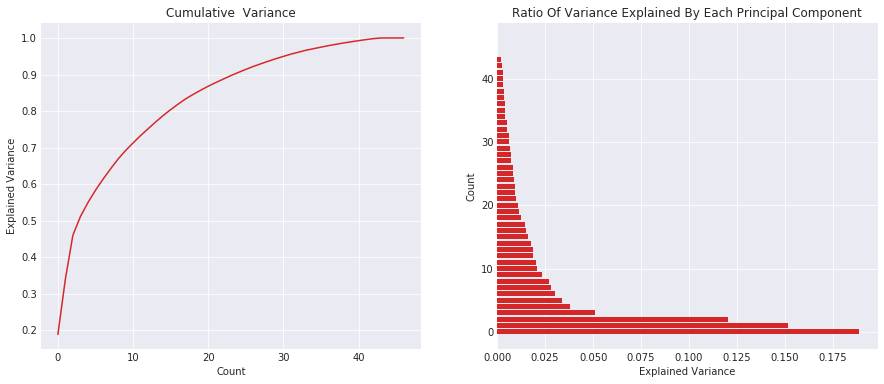

                       EXPLAINED_VAR
ALTERSKATEGORIE_GROB          0.1888
FINANZ_MINIMALIST             0.1517
FINANZ_SPARER                 0.1202
FINANZ_VORSORGER              0.0509
FINANZ_ANLEGER                0.0382
FINANZ_UNAUFFAELLIGER         0.0336
FINANZ_HAUSBAUER              0.0302
RETOURTYP_BK_S                0.0282
SEMIO_SOZ                     0.0269
SEMIO_FAM                     0.0234
SEMIO_REL                     0.0208
SEMIO_MAT                     0.0202
SEMIO_VERT                    0.0187
SEMIO_LUST                    0.0186
SEMIO_ERL                     0.0175
SEMIO_KULT                    0.0163
SEMIO_RAT                     0.0151
SEMIO_KRIT                    0.0144
SEMIO_DOM                     0.0122
SEMIO_KAEM                    0.0115
SEMIO_PFLICHT                 0.0109
SEMIO_TRADV                   0.0099
ANZ_PERSONEN                  0.0095
ANZ_TITEL                     0.0095
HH_EINKOMMEN_SCORE            0.0087
WOHNDAUER_2008                0.0084
A

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,...,ORTSGR_KLS9,RELAT_AB,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ,MOVEMENT,DECADE,WEALTH,LIFE_STAGE
0,-0.2902,-0.1886,0.2910,-0.2696,0.2187,0.2371,-0.0035,-0.1516,0.0829,0.1999,...,0.0420,0.0270,-0.0000,-0.0581,0.0581,-0.0000,0.0528,0.2684,0.0634,-0.0731
1,0.0477,0.1931,-0.0888,0.0639,-0.1378,-0.0745,-0.1311,0.0508,0.2423,0.2046,...,-0.0734,-0.0520,0.0000,-0.3390,0.3390,0.0000,-0.0756,-0.0441,-0.0830,0.0368
2,0.0493,-0.1327,-0.0305,0.0538,-0.1444,-0.1008,0.2215,0.1235,0.1089,0.0583,...,0.3309,0.2333,-0.0000,-0.0862,0.0862,-0.0000,0.0633,-0.0701,0.2524,-0.1437
3,-0.0510,0.1631,-0.0398,-0.0263,-0.1382,0.0416,-0.2407,-0.0273,0.0228,-0.0695,...,0.2727,0.0860,0.0000,0.0415,-0.0415,-0.0000,-0.4338,0.0766,-0.2556,0.1407
4,-0.0020,-0.1658,-0.0128,-0.0657,-0.0693,-0.1915,0.0872,-0.1815,0.1720,-0.2484,...,-0.0590,-0.0750,-0.0000,0.1159,-0.1159,0.0000,0.0024,0.2068,-0.0514,-0.0552
5,-0.0363,-0.0265,-0.0291,0.0667,-0.0593,0.0240,0.0662,0.0945,-0.0064,0.0600,...,-0.0456,-0.3912,0.0000,0.0083,-0.0083,-0.0000,-0.0643,-0.0708,-0.1030,0.0509
6,0.2005,-0.1046,0.2718,-0.2410,0.2295,0.3240,-0.0862,-0.1815,-0.0267,0.0257,...,0.0312,-0.0529,0.0000,-0.1155,0.1155,-0.0000,-0.0314,0.1947,0.0501,-0.0872
7,-0.0110,-0.0227,0.0410,-0.0205,0.1126,-0.0123,0.1013,-0.1327,0.0300,0.0102,...,-0.0194,0.2316,-0.0000,0.0042,-0.0042,-0.0000,-0.0808,-0.0115,0.0031,0.1654
8,0.0154,0.1318,-0.0553,-0.0345,-0.0527,0.0140,-0.2348,0.1043,-0.1009,0.0236,...,-0.0071,0.1457,0.0000,-0.0239,0.0239,-0.0000,0.0792,-0.0095,0.0058,0.0122
9,0.0487,0.1552,-0.0421,0.0228,-0.0130,-0.0456,-0.2236,0.0568,-0.0843,0.0242,...,-0.0625,0.0213,-0.0000,0.0073,-0.0073,0.0000,0.0452,0.0038,0.2749,-0.5812


In [69]:
# Investigate the variance accounted for by each principal component.
pca_all ,weights_all ,  azdias_pca = make_pca(len(azdias_scaled.columns) , azdias_scaled)
weights_all

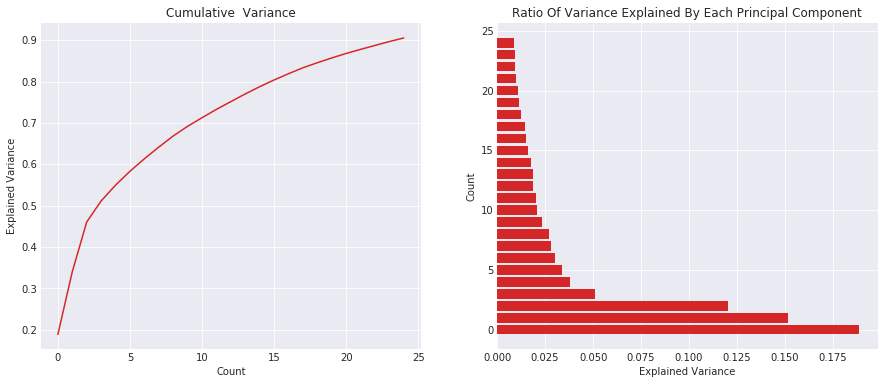

                       EXPLAINED_VAR
ALTERSKATEGORIE_GROB          0.1888
FINANZ_MINIMALIST             0.1517
FINANZ_SPARER                 0.1202
FINANZ_VORSORGER              0.0509
FINANZ_ANLEGER                0.0382
FINANZ_UNAUFFAELLIGER         0.0336
FINANZ_HAUSBAUER              0.0302
RETOURTYP_BK_S                0.0282
SEMIO_SOZ                     0.0269
SEMIO_FAM                     0.0234
SEMIO_REL                     0.0208
SEMIO_MAT                     0.0202
SEMIO_VERT                    0.0187
SEMIO_LUST                    0.0186
SEMIO_ERL                     0.0175
SEMIO_KULT                    0.0163
SEMIO_RAT                     0.0151
SEMIO_KRIT                    0.0144
SEMIO_DOM                     0.0122
SEMIO_KAEM                    0.0115
SEMIO_PFLICHT                 0.0109
SEMIO_TRADV                   0.0099
ANZ_PERSONEN                  0.0095
ANZ_TITEL                     0.0094
HH_EINKOMMEN_SCORE            0.0087


,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,...,ORTSGR_KLS9,RELAT_AB,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ,MOVEMENT,DECADE,WEALTH,LIFE_STAGE
0,-0.2902,-0.1886,0.2910,-0.2696,0.2187,0.2371,-0.0035,-0.1516,0.0829,0.1999,...,0.0420,0.0270,-0.0,-0.0581,0.0581,-0.0,0.0528,0.2684,0.0634,-0.0731
1,0.0477,0.1931,-0.0888,0.0639,-0.1378,-0.0745,-0.1311,0.0508,0.2423,0.2046,...,-0.0734,-0.0520,0.0,-0.3390,0.3390,0.0,-0.0756,-0.0441,-0.0830,0.0368
2,0.0493,-0.1327,-0.0305,0.0538,-0.1444,-0.1008,0.2215,0.1235,0.1089,0.0583,...,0.3309,0.2333,-0.0,-0.0862,0.0862,-0.0,0.0633,-0.0701,0.2524,-0.1437
3,-0.0510,0.1631,-0.0398,-0.0263,-0.1382,0.0416,-0.2407,-0.0273,0.0228,-0.0695,...,0.2727,0.0860,-0.0,0.0415,-0.0415,-0.0,-0.4338,0.0766,-0.2556,0.1407
4,-0.0020,-0.1658,-0.0128,-0.0657,-0.0693,-0.1915,0.0872,-0.1815,0.1720,-0.2484,...,-0.0590,-0.0750,0.0,0.1159,-0.1159,0.0,0.0024,0.2068,-0.0514,-0.0552
5,-0.0363,-0.0265,-0.0291,0.0667,-0.0593,0.0240,0.0662,0.0945,-0.0064,0.0601,...,-0.0456,-0.3912,0.0,0.0083,-0.0083,0.0,-0.0643,-0.0708,-0.1030,0.0509
6,0.2005,-0.1046,0.2718,-0.2410,0.2294,0.3240,-0.0862,-0.1815,-0.0267,0.0257,...,0.0311,-0.0529,-0.0,-0.1155,0.1155,-0.0,-0.0314,0.1947,0.0501,-0.0872
7,-0.0110,-0.0227,0.0410,-0.0205,0.1126,-0.0122,0.1013,-0.1327,0.0300,0.0101,...,-0.0194,0.2316,-0.0,0.0042,-0.0042,-0.0,-0.0807,-0.0115,0.0031,0.1654
8,0.0153,0.1318,-0.0553,-0.0345,-0.0527,0.0140,-0.2348,0.1043,-0.1009,0.0236,...,-0.0071,0.1457,-0.0,-0.0239,0.0239,-0.0,0.0792,-0.0095,0.0058,0.0122
9,0.0488,0.1551,-0.0421,0.0228,-0.0130,-0.0456,-0.2236,0.0568,-0.0843,0.0241,...,-0.0625,0.0213,-0.0,0.0073,-0.0073,-0.0,0.0452,0.0038,0.2749,-0.5812


In [70]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca_25 , weights_25 , azdias_pca_25 = make_pca(25 , azdias_scaled)
weights_25

### Discussion 2.2: Perform Dimensionality Reduction

I chose to reduce the dimensions by 22 columns and still gets a variance equals to above 90% 

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [71]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

#sorting using the weights for the first principal component in the dataset that are defined in the make_pca function 
weight_1 = weights_25.iloc[0].sort_values(ascending=False)
weight_1

FINANZ_SPARER            0.2910
SEMIO_REL                0.2746
DECADE                   0.2684
SEMIO_PFLICHT            0.2668
SEMIO_TRADV              0.2445
FINANZ_UNAUFFAELLIGER    0.2371
FINANZ_ANLEGER           0.2187
SEMIO_RAT                0.2083
SEMIO_KULT               0.2080
SEMIO_FAM                0.1999
SEMIO_MAT                0.1889
ONLINE_AFFINITAET        0.1055
SEMIO_SOZ                0.0829
WEALTH                   0.0634
SOHO_KZ                  0.0581
MOVEMENT                 0.0528
EWDICHTE                 0.0423
ORTSGR_KLS9              0.0420
HH_EINKOMMEN_SCORE       0.0416
ARBEIT                   0.0277
RELAT_AB                 0.0270
ANZ_HAUSHALTE_AKTIV      0.0224
MIN_GEBAEUDEJAHR         0.0021
ANREDE_KZ               -0.0000
OST_WEST_KZ             -0.0000
SEMIO_VERT              -0.0017
FINANZ_HAUSBAUER        -0.0035
ANZ_HH_TITEL            -0.0070
ANZ_TITEL               -0.0091
ANZ_PERSONEN            -0.0095
KBA13_ANZAHL_PKW        -0.0209
BALLRAUM

In [72]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

#sorting using the weights for the second principal component in the dataset that are defined in the make_pca function 
weight_2 = weights_25.iloc[1].sort_values(ascending=False)
weight_2

SOHO_KZ                  0.3390
SEMIO_VERT               0.3267
SEMIO_KULT               0.2454
SEMIO_SOZ                0.2423
SEMIO_FAM                0.2046
FINANZ_MINIMALIST        0.1931
FINANZ_VORSORGER         0.0639
KONSUMNAEHE              0.0602
INNENSTADT               0.0566
ANZ_PERSONEN             0.0565
SEMIO_MAT                0.0516
RETOURTYP_BK_S           0.0508
ALTERSKATEGORIE_GROB     0.0477
SEMIO_REL                0.0461
BALLRAUM                 0.0409
LIFE_STAGE               0.0368
MIN_GEBAEUDEJAHR         0.0356
GEBAEUDETYP_RASTER       0.0312
KBA13_ANZAHL_PKW         0.0300
ONLINE_AFFINITAET        0.0281
WOHNDAUER_2008           0.0163
SEMIO_LUST               0.0158
ANZ_TITEL                0.0070
OST_WEST_KZ              0.0000
ANREDE_KZ                0.0000
ANZ_HH_TITEL            -0.0116
SEMIO_TRADV             -0.0278
ANZ_HAUSHALTE_AKTIV     -0.0431
DECADE                  -0.0441
ARBEIT                  -0.0502
RELAT_AB                -0.0520
SEMIO_PF

In [73]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

#sorting using the weights for the third principal component in the dataset that are defined in the make_pca function 
weight_3 = weights_25.iloc[2].sort_values(ascending=False)
weight_3


ORTSGR_KLS9              0.3309
EWDICHTE                 0.3237
WEALTH                   0.2524
ARBEIT                   0.2454
HH_EINKOMMEN_SCORE       0.2358
RELAT_AB                 0.2333
FINANZ_HAUSBAUER         0.2215
ANZ_HAUSHALTE_AKTIV      0.2003
RETOURTYP_BK_S           0.1235
SEMIO_SOZ                0.1089
SOHO_KZ                  0.0862
ANZ_HH_TITEL             0.0740
SEMIO_VERT               0.0719
MOVEMENT                 0.0633
SEMIO_KULT               0.0630
SEMIO_FAM                0.0583
FINANZ_VORSORGER         0.0538
ALTERSKATEGORIE_GROB     0.0493
SEMIO_LUST               0.0477
ANZ_TITEL                0.0080
SEMIO_MAT                0.0018
ANREDE_KZ               -0.0000
OST_WEST_KZ             -0.0000
SEMIO_ERL               -0.0098
SEMIO_REL               -0.0150
WOHNDAUER_2008          -0.0276
FINANZ_SPARER           -0.0305
SEMIO_PFLICHT           -0.0336
SEMIO_KAEM              -0.0354
SEMIO_TRADV             -0.0531
SEMIO_DOM               -0.0609
SEMIO_KR

### Discussion 2.3: Interpret Principal Components


##### for the first row :
- FINANZ_SPARER and SEMIO_REL have a positve correlation it seems that religious people save more money .

- DECADE and SEMIO_PFLICHT have a positve correlation it seems that timeline affected by the dutiful of people as time increase people tend to be more dutiful , and this seems to aply in the second and third component as well.

- FINANZ_SPARER and ALTERSKATEGORIE_GROB have a negative correlation it seems that age doesn't have a relation with saving money .

- SEMIO_REL and FINANZ_VORSORGER have a negative correlation it seem that religious people are not financially prepared   .  

##### for the second principal component :               

- SEMIO_VERT and SEMIO_FAM have a postive correlation it seems that dreamful people are family minded

##### for the third principal component :               
- ORTSGR_KLS9 and INNENSTADT have a negative correlation is seems that size of community is not affected by the distance to the city center

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [64]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...
# compute the average within-cluster distances.

from sklearn.cluster import KMeans
#range for clusters 1-20
K = np.arange(1,21,1)

#calculating the scores for each cluster
scores = [np.abs(KMeans(i).fit(azdias_pca_25).score(azdias_pca_25)) for i in K]
    
    
    

Text(0.5,0,'K')

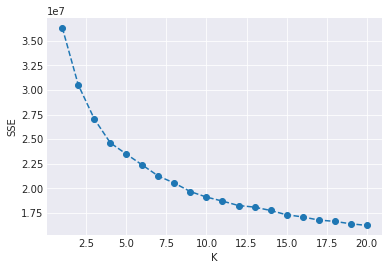

In [65]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

#plotting the scree plot 
plt.plot(K , scores , linestyle='--' , marker = 'o')
plt.ylabel('SSE')
plt.xlabel('K')



In [66]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

#applying the kmean with 17 clusters 
kmean_17 = KMeans(17)
model_17 = kmean_17.fit(azdias_pca_25)

#predictions 
azdias_pred = model_17.predict(azdias_pca_25)

In [67]:
azdias_pred

array([7, 3, 0, ..., 9, 2, 1], dtype=int32)

### Discussion 3.1: Apply Clustering to General Population


- After at the scree plot I chose 17 to be the number of clusters 

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [68]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv' , sep=';')
customers

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0
5,1,3,1,4.0,5,1,5,1,2,3,...,2.0,3.0,2.0,1.0,1.0,5.0,5.0,3.0,7.0,5.0
6,2,4,1,2.0,5,1,5,1,1,2,...,3.0,2.0,1.0,0.0,1.0,5.0,5.0,2.0,3.0,2.0
7,1,4,1,2.0,5,1,5,1,2,2,...,3.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,4.0,3.0
8,2,4,2,1.0,2,2,5,1,1,5,...,1.0,4.0,2.0,1.0,5.0,5.0,4.0,3.0,8.0,3.0
9,1,3,1,3.0,5,2,4,1,3,1,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,3.0,6.0,4.0


In [69]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

#creating a cleaned version of the customer dataset 
customers_cleaned = clean_data(customers)

#after applying the clean_data function I still get 65 columns so the below step is to ensure that we only have the 47 columns
#thats are in azdias dataset
customers_cleaned = customers_cleaned.loc[: , azdias_cleaned.columns.intersection(customers_cleaned.columns)]

#filling the missing entries
customer_imp = imp.transform(customers_cleaned)

#scales the data
customer_imp_SS = SS.transform(customer_imp)

#creates a scaled with no missing enties dataset 
customer_scaled = pd.DataFrame(customer_imp_SS , columns=customers_cleaned.columns)

#pca transformed data 
customer_pca_25 = pca_25.transform(customer_scaled)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [70]:
customers_cleaned

,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,...,ORTSGR_KLS9,RELAT_AB,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,OST_WEST_KZ,MOVEMENT,DECADE,WEALTH,LIFE_STAGE
0,4.0,5,1,5,1,2,2,5.0,6,5,...,2.0,1.0,1,0,0.0,NaN,0.0,1950.0,1.0,3.0
1,4.0,5,1,5,1,3,2,NaN,3,6,...,NaN,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN
2,4.0,5,1,5,1,4,4,5.0,2,2,...,5.0,3.0,2,1,0.0,1,0.0,1950.0,3.0,4.0
3,4.0,5,1,5,2,1,2,3.0,6,5,...,3.0,1.0,1,0,0.0,NaN,1.0,1940.0,2.0,4.0
4,3.0,3,1,4,4,5,2,5.0,4,5,...,5.0,1.0,1,0,0.0,NaN,1.0,1970.0,4.0,1.0
5,3.0,5,1,5,1,2,3,3.0,6,4,...,7.0,5.0,1,0,0.0,NaN,0.0,1950.0,3.0,4.0
6,4.0,5,1,5,1,1,2,5.0,4,2,...,3.0,2.0,1,0,0.0,NaN,0.0,1950.0,2.0,3.0
7,4.0,5,1,5,1,2,2,5.0,6,4,...,4.0,3.0,1,0,0.0,NaN,0.0,1950.0,1.0,5.0
8,4.0,2,2,5,1,1,5,5.0,2,3,...,8.0,3.0,2,1,0.0,1,1.0,1940.0,5.0,5.0
9,3.0,5,2,4,1,3,1,2.0,6,4,...,6.0,4.0,1,0,0.0,NaN,0.0,1970.0,1.0,5.0


In [71]:
#prediction
customer_pred = model_17.predict(customer_pca_25)

In [72]:
#number of clusters 
set(customer_pred)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

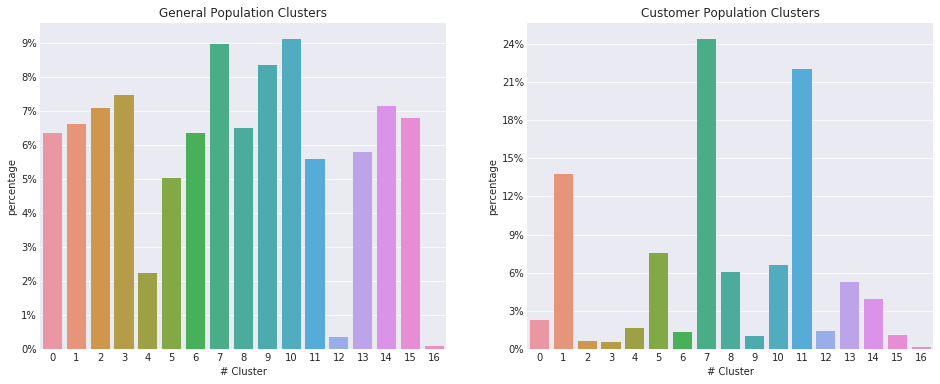

In [82]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

#creates a proportion of each cluster in the two datasets
azdias_pred = np.array(azdias_pred)
customer_pred = np.array(customer_pred)
prop_general = [(np.sum(azdias_pred == i) / len(azdias_pred) *100) for i in range(17)]
prop_customer = [(np.sum(customer_pred == i) / len(customer_pred) * 100) for i in range(17)]


#plotting each cluster percentage 
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.barplot(x = list(range(17)) , y = prop_general )
plt.title('General Population Clusters')
plt.ylabel('percentage')
y_ticks = np.arange(0 , max(prop_general) , 1)
y_labels = ['{:.0f}%'.format(i) for i in y_ticks]
plt.yticks(y_ticks , y_labels)
plt.xlabel('# Cluster')

plt.subplot(1,2,2)
sns.barplot(x = list(range(17)) , y = prop_customer )
plt.title('Customer Population Clusters')
plt.ylabel('percentage')
y_ticks = np.arange(0 , max(prop_customer) , 3)
y_labels = ['{:.0f}%'.format(i) for i in y_ticks]
plt.yticks(y_ticks , y_labels)
plt.xlabel('# Cluster')

plt.show()

In [74]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

#viewing what kind of people in cluster 5
azdias_cleaned['label'] = azdias_pred.reshape(-1,1)
for col in list(customers_cleaned):
    print(azdias_cleaned[azdias_cleaned.label == 5][col].value_counts())


3.0    23706
4.0    19014
2.0     1196
1.0      945
Name: ALTERSKATEGORIE_GROB, dtype: int64
5    23146
4    16844
3     3857
2     1048
1       51
Name: FINANZ_MINIMALIST, dtype: int64
1    25578
2    15488
3     3304
4      513
5       63
Name: FINANZ_SPARER, dtype: int64
5    23946
4    15788
3     4208
2      539
1      465
Name: FINANZ_VORSORGER, dtype: int64
1    20089
2    12562
3     7953
4     3750
5      592
Name: FINANZ_ANLEGER, dtype: int64
2    17548
1    14878
3    10323
4     1178
5     1019
Name: FINANZ_UNAUFFAELLIGER, dtype: int64
3    13756
1    12340
2    11331
4     5945
5     1574
Name: FINANZ_HAUSBAUER, dtype: int64
5.0    20784
2.0    11881
3.0    10255
4.0      926
1.0      741
Name: RETOURTYP_BK_S, dtype: int64
2    17114
5    11827
4     9316
1     4205
3     2484
Name: SEMIO_SOZ, dtype: int64
3    20295
1    17004
2     5553
4     1365
5      632
6       97
Name: SEMIO_FAM, dtype: int64
1    19800
3    13516
2     8724
4     1640
7      683
5      583
Name: S

In [75]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

#viewing what kind of people in cluster 15
azdias_cleaned['label'] = azdias_pred.reshape(-1,1)
for col in list(azdias_cleaned):
    print(azdias_cleaned[azdias_cleaned.label == 15][col].value_counts())


1.0    30652
2.0    29006
3.0      786
4.0       23
Name: ALTERSKATEGORIE_GROB, dtype: int64
3    15025
2    14452
4    14248
1     9127
5     7735
Name: FINANZ_MINIMALIST, dtype: int64
4    22772
5    21961
3    10467
2     4704
1      683
Name: FINANZ_SPARER, dtype: int64
2    18578
3    18260
1    17452
4     5664
5      633
Name: FINANZ_VORSORGER, dtype: int64
5    24348
4    15658
3    12489
2     6555
1     1537
Name: FINANZ_ANLEGER, dtype: int64
5    23617
4    18231
3    12592
2     4062
1     2085
Name: FINANZ_UNAUFFAELLIGER, dtype: int64
1    18537
2    16693
3    12824
4     6738
5     5795
Name: FINANZ_HAUSBAUER, dtype: int64
1.0    25921
4.0    21448
3.0     9168
5.0     2977
2.0      722
Name: RETOURTYP_BK_S, dtype: int64
7    59653
6      522
4      240
3      172
Name: SEMIO_SOZ, dtype: int64
7    59773
6      469
5      215
4      118
2       12
Name: SEMIO_FAM, dtype: int64
7    30934
6    29003
4      627
5       21
2        2
Name: SEMIO_REL, dtype: int64
5    26076

### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

- Cluster 5 which is overrepresented in customer data 

we can say that cluster 5 :

1- financially interested

2- low-money savers 

3- most of the customers are between 46-60 years old

4- customers are soically minded , dreamful and cultural minded 

5- customers youth is the 90s

6- customers are less affluent household

7- customers are older families and mature couples 

- Cluster 15 which is underrepresented in customer data 

we can say that cluster 15 :

1- people are above 60 years old

2- people are not financially interested and not home oweners 

3- people are family mined , religious and traditional minded

4- people's youth is the west and in the 50s 

5- people are poorer households and elders in retirement 

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.